# Analizing one run of the EA

# Preliminaries
## Importing packages

In [7]:
import numpy as np

%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

from thesis_EAfunc import *
from thesis_visfunc import *

# Define landscape

In [22]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size(9.1,3.9)
import math
def g(x,y):
    mag = np.sqrt(x**2 + y**2)
    return -(50*np.sinc(mag/np.pi) - mag)

#Problem definition
def f(x, y):
    tripsinc = g(x+11, y+9) + g(x-11, y-3) + g(x+6, y-9) - ( g(-6+11,9+9) + g(-6-11,9-3) + g(0,0))
    return tripsinc

#Testing the maximum
print(f(-1,-1), f(-11,-9), f(11,3), f(-6,9))

50.589320445689474 5.146085938881416 6.0759688994616745 0.0


# Running the Evolutionary Algorithm
## Setting the EA's parameters

In [24]:
#starting seed
np.random.seed(654321)

In [34]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 1
gen_f = 40

## Population size
pop_s = 12

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 6

## Progeny subpopulation's and size
prog_s = 6
### Crossover Method
crossover = 'None'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='Ranking'

## We run the EA for 1 generation

run_n = 0
birthcounter = 0

population, generations, birthcounter, gen_n = EA_start(pop_s, domain, f, birthcounter)

for i in range(gen_f):
    birthcounter, progeny = EA_prog(population, par_s, prog_s, birthcounter, gen_n, mut_p, mut_s, domain, f, par_selection, crossover, mutation)
    generations = EA_prog_to_df(generations, progeny)
    gen_n, population, progeny = EA_new_population(population, progeny, gen_n, pop_s, f, population_new)
    generations = EA_pop_to_df(generations, population)

fitness = EA_fitn_summary(generations)

In [35]:
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [36]:
query = (genera_res['generation']==32)
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
576,0,32,64,population,20.808660,-10.126638,-10.669741
577,0,32,188,population,20.985264,-10.200477,-10.170800
578,0,32,190,population,20.985264,-10.200477,-10.170800
579,0,32,137,population,20.985264,-10.200477,-10.170800
580,0,32,158,population,20.985264,-10.200477,-10.170800
581,0,32,163,population,20.985264,-10.200477,-10.170800
582,0,32,151,population,20.985264,-10.200477,-10.170800
583,0,32,191,population,21.767872,-9.824857,-9.096763
584,0,32,117,population,21.767872,-9.824857,-9.096763
585,0,32,85,population,21.767872,-9.824857,-9.096763


# Visualization
## Fitness development

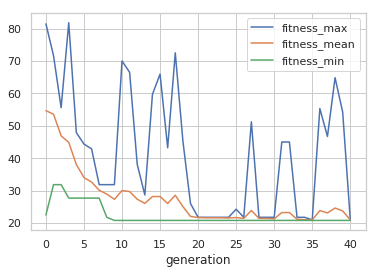

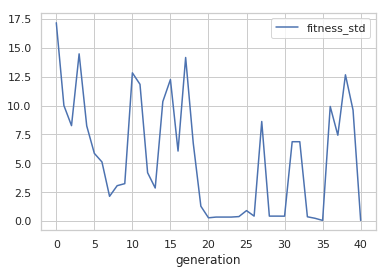

In [37]:
EA_fitn_dev(fitness_res, 0)

## Visualizing Landscape

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


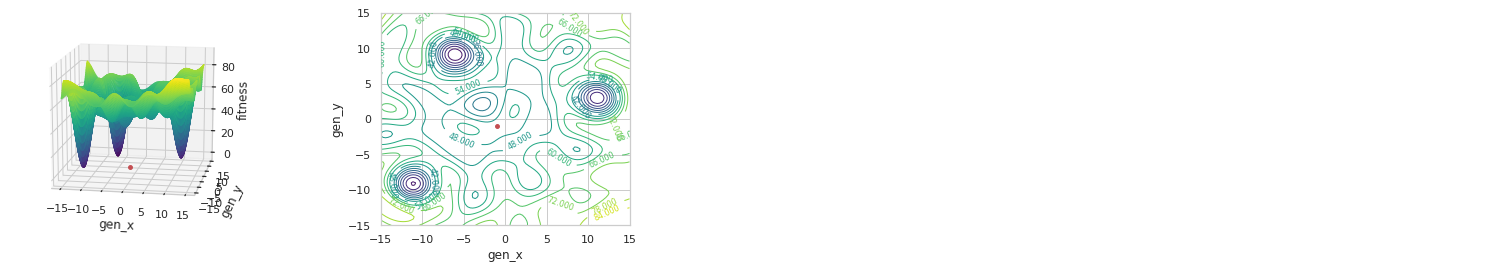

In [38]:
EA_plt_land(f, domain, 101, a=15, b=-80)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


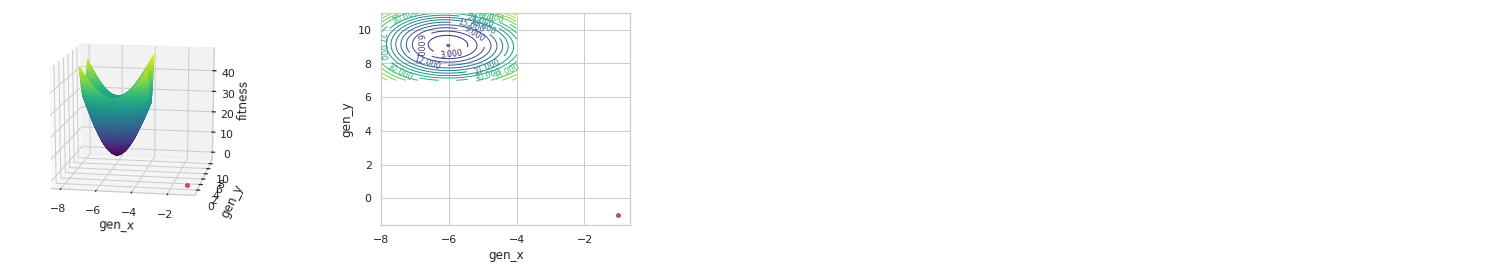

In [39]:
domain_min=(-8,-4,7,11)
EA_plt_land(f, domain_min, 101, a=15, b=-80)

## Visualizing initial population and its progeny

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


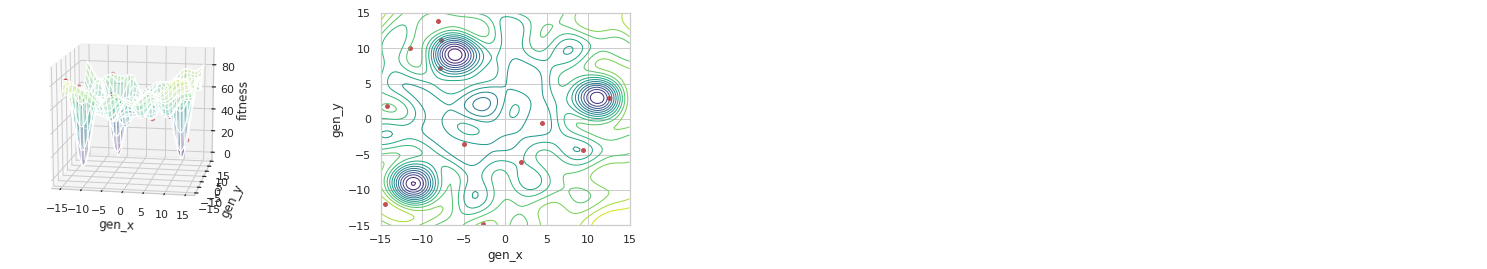

In [40]:
steps=101  #Graphing resolution parameter
run_s=0  #First (and only) run
gen_s=0  #First generation
EA_plt_pop(f, domain, steps, genera_res, run_s, gen_s, a=15, b=-80)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


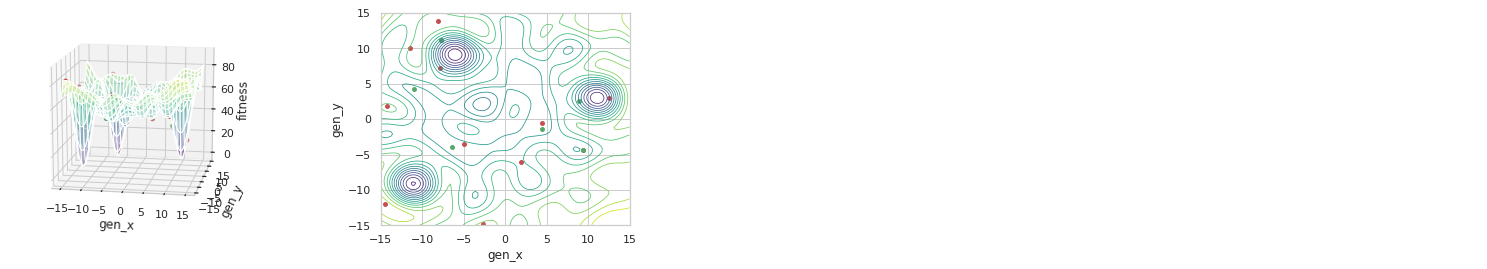

In [41]:
EA_plt_gen(f, domain, steps, genera_res, run_s, gen_s, a=15, b=-80)

## Checking movement of population

Generation 0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


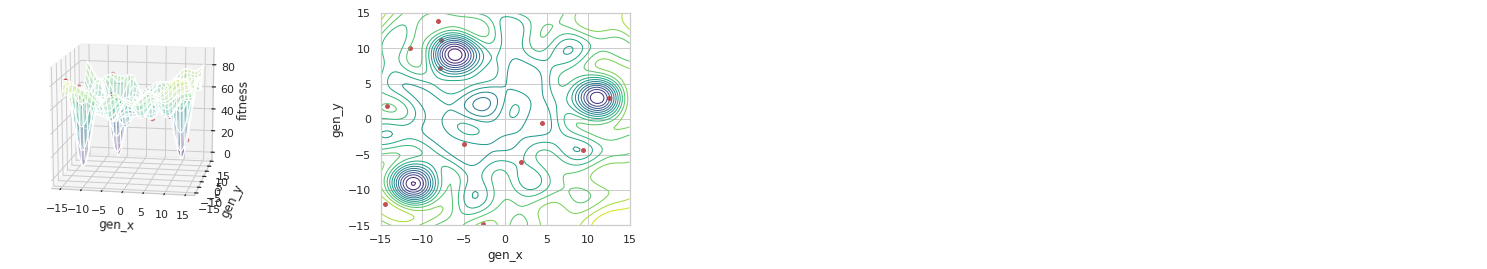

Generation 4


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


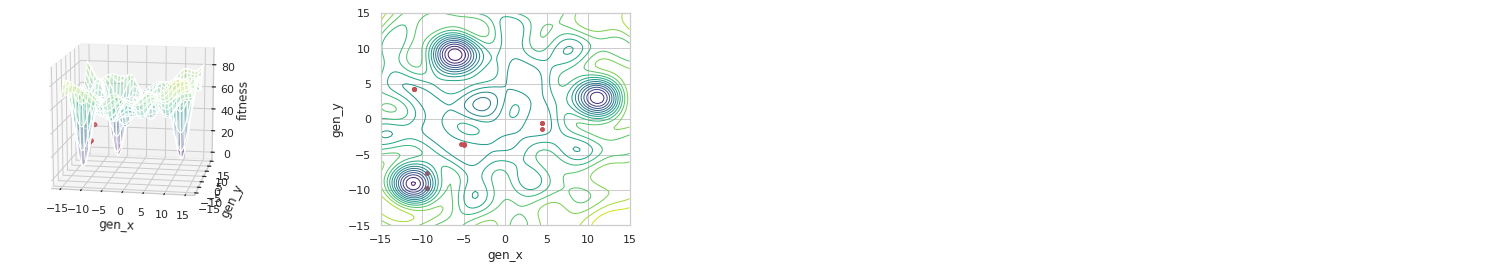

Generation 8


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


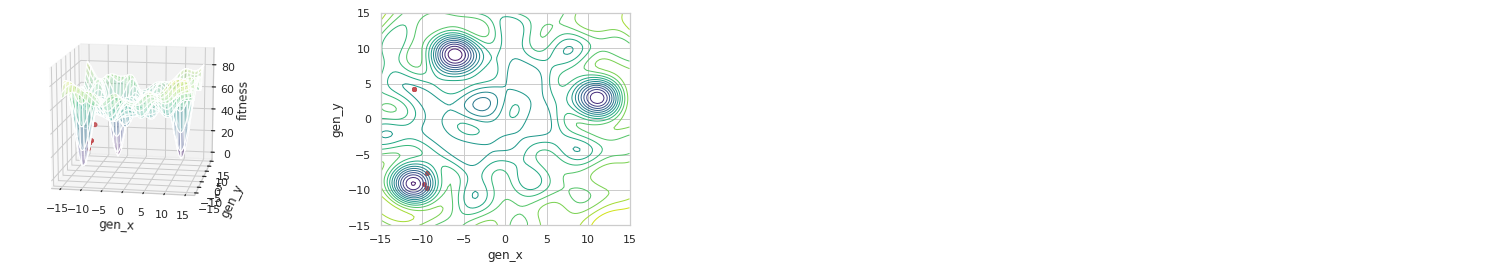

Generation 16


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


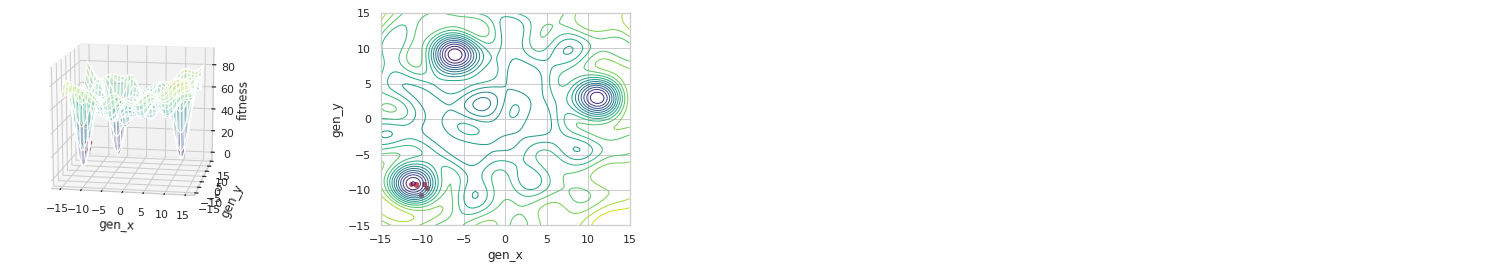

Generation 24


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


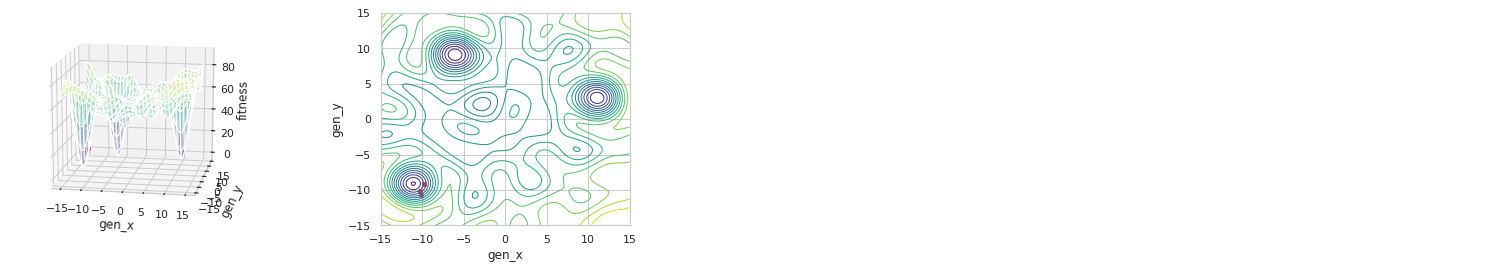

Generation 32


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


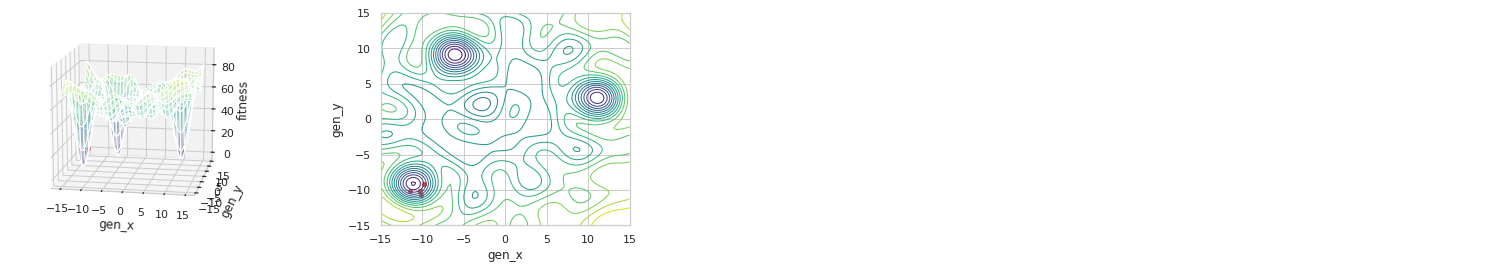

Generation 40


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


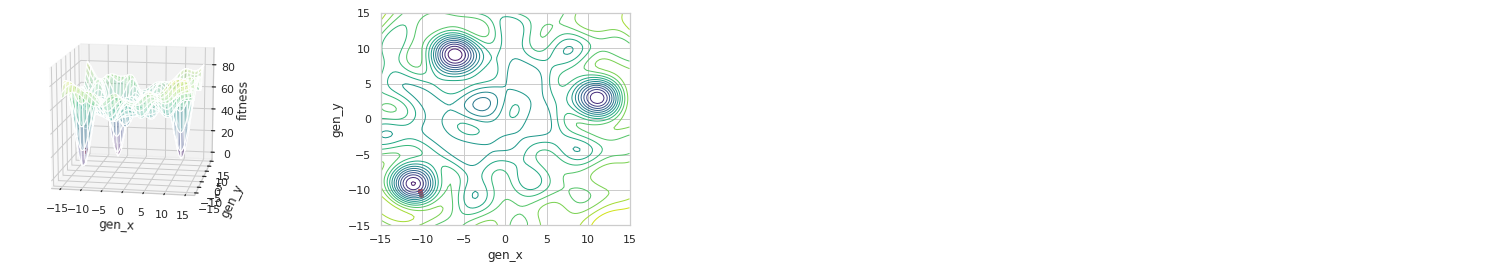

In [42]:
print('Generation 0')
EA_plt_pop(f, domain, steps, genera_res, run_s, 0, a=15, b=-80)
print('Generation 4')
EA_plt_pop(f, domain, steps, genera_res, run_s, 4, a=15, b=-80)
print('Generation 8')
EA_plt_pop(f, domain, steps, genera_res, run_s, 8, a=15, b=-80)
print('Generation 16')
EA_plt_pop(f, domain, steps, genera_res, run_s, 16, a=15, b=-80)
print('Generation 24')
EA_plt_pop(f, domain, steps, genera_res, run_s, 24, a=15, b=-80)
print('Generation 32')
EA_plt_pop(f, domain, steps, genera_res, run_s, 32, a=15, b=-80)
print('Generation 40')
EA_plt_pop(f, domain, steps, genera_res, run_s, 40, a=15, b=-80)

In [32]:
import numpy as np
a= np.array([-1,0,1])
b= np.array([-1,0,1])

def f(x,y):
    mag = np.sqrt(x**2 + y**2)
    
    return mag

f(a,b)

array([1.41421356, 0.        , 1.41421356])